In [14]:
import PIL.Image as Image
import PIL.ImageOps as ImageOps
import argparse

from process import load_checkpoint, load_seg_model, get_palette, generate_mask


In [3]:
device = 'cuda:0'

# load model
model = load_seg_model('./model/cloth_segm.pth', device=device)

# open one image
image = Image.open('./input/03615_00.jpg').convert('RGB')


Model already exists.
----checkpoints loaded from path: ./model/cloth_segm.pth----


In [4]:

palette = get_palette(4)
alpha_masks, cloth_seg = generate_mask(image, net=model, palette=palette, device=device)


c:\Users\judy8\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [5]:

import sys
import numpy as np

# np.set_printoptions(threshold=sys.maxsize)

np.array(alpha_masks[1])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
import numpy as np
import cv2

masked = cv2.copyTo(np.array(image), np.array(alpha_masks[1]), np.full_like(image, 0.))

In [7]:
nonzero_coords = np.nonzero(np.array(masked))

height = masked.shape[0]
width = masked.shape[1]

margin = 5

min_x = max(min(nonzero_coords[0]) - margin, 0) 
min_y = max(min(nonzero_coords[1]) - margin, 0)

max_x = min(max(nonzero_coords[0]) + margin, height)
max_y = min(max(nonzero_coords[1]) + margin, width)

print(min_x, min_y, max_x, max_y)


289 115 923 590


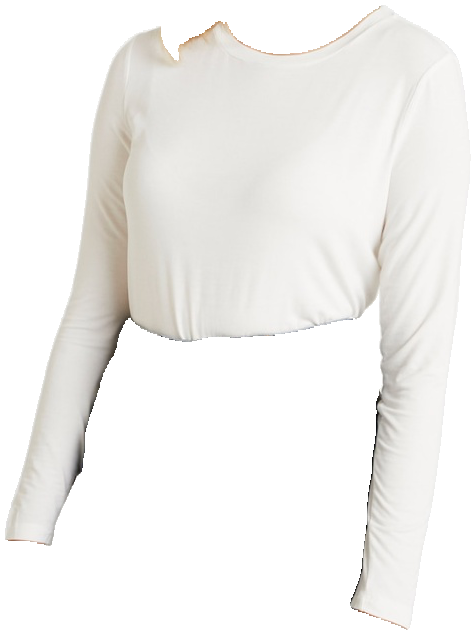

In [8]:
# crop the image with the bounding box
result = Image.fromarray(cv2.copyTo(np.array(image), np.array(alpha_masks[1]), np.full_like(image, 255.))).crop((min_y, min_x, max_y, max_x))

# resize image to 512 * 512 with keeping the ratio
result = ImageOps.pad(result, (512,512), color="white")

result

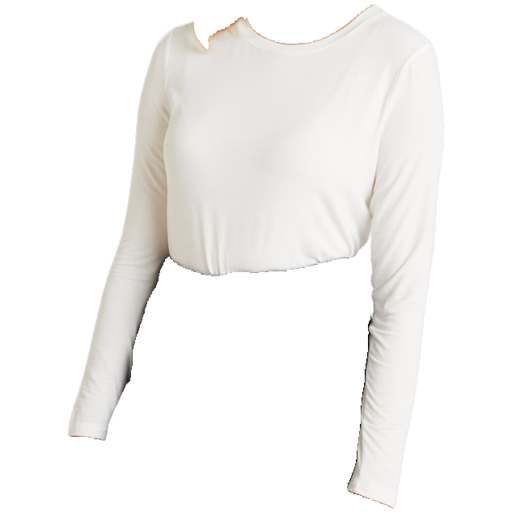